In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!unzip '/content/archive (1).zip'

Archive:  /content/archive (1).zip
  inflating: Online Sales Data.csv   


In [3]:
df =pd.read_csv('/content/Online Sales Data.csv')


In [4]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
 9   year              240 non-null    int32         
 10  month             240 non-null    int32         
 11  day               240 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 19.8+ KB


In [8]:
df['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [9]:
df['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [10]:
df['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Debit Card'], dtype=object)

In [11]:
df.describe()

,Transaction ID,Date,Units Sold,Unit Price,Total Revenue,year,month,day
count,240.00000,240,240.000000,240.000000,240.000000,240.0,240.000000,240.000000
mean,10120.50000,2024-04-29 12:00:00,2.158333,236.395583,335.699375,2024.0,4.458333,15.529167
min,10001.00000,2024-01-01 00:00:00,1.000000,6.500000,6.500000,2024.0,1.000000,1.000000
25%,10060.75000,2024-02-29 18:00:00,1.000000,29.500000,62.965000,2024.0,2.750000,8.000000
50%,10120.50000,2024-04-29 12:00:00,2.000000,89.990000,179.970000,2024.0,4.000000,15.500000
75%,10180.25000,2024-06-28 06:00:00,3.000000,249.990000,399.225000,2024.0,6.000000,23.000000
max,10240.00000,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000,2024.0,8.000000,31.000000
std,69.42622,NaN,1.322454,429.446695,485.804469,0.0,2.275560,8.722067


##### Total Sale

In [12]:
df['Total Revenue'].sum()

np.float64(80567.84999999999)

##### Daily Sale

In [13]:
total_days = df['Date'].nunique()
total_days

240

In [14]:
daily_sale = df['Total Revenue'].sum() / total_days
daily_sale

np.float64(335.699375)

##### Monthly Sale

In [15]:
monthly_revenue = df.groupby('month')['Total Revenue'].sum()
monthly_revenue.sort_values(ascending=False)

,Total Revenue
month,
1,14548.32
3,12849.24
4,12451.69
2,10803.37
5,8455.49
6,7384.55
8,7278.11
7,6797.08


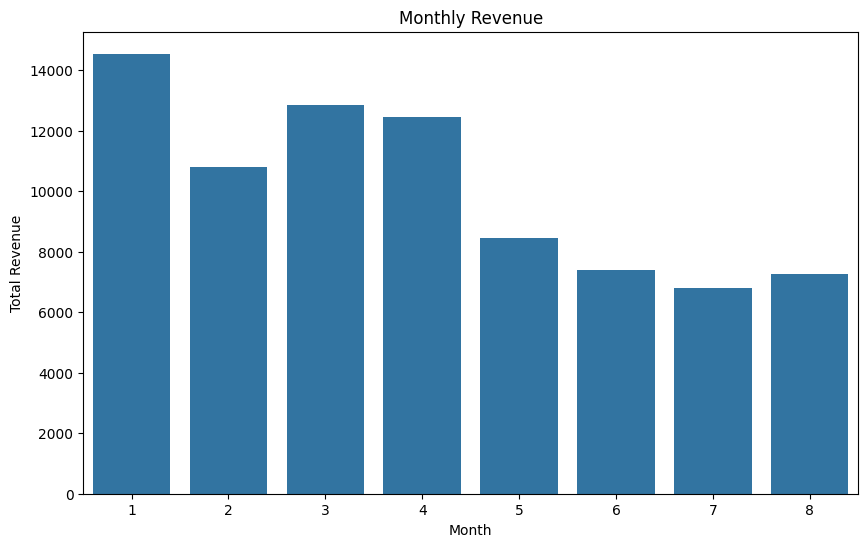

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue')
plt.show()

##### Total Orders

In [17]:
total_orders = df['Transaction ID'].nunique()
total_orders

240

##### Monthly orders

In [18]:
monthly_orders = df.groupby('month')['Transaction ID'].nunique()
monthly_orders.sort_values(ascending=False)

,Transaction ID
month,
1,31
3,31
7,31
5,31
6,30
4,30
2,29
8,27


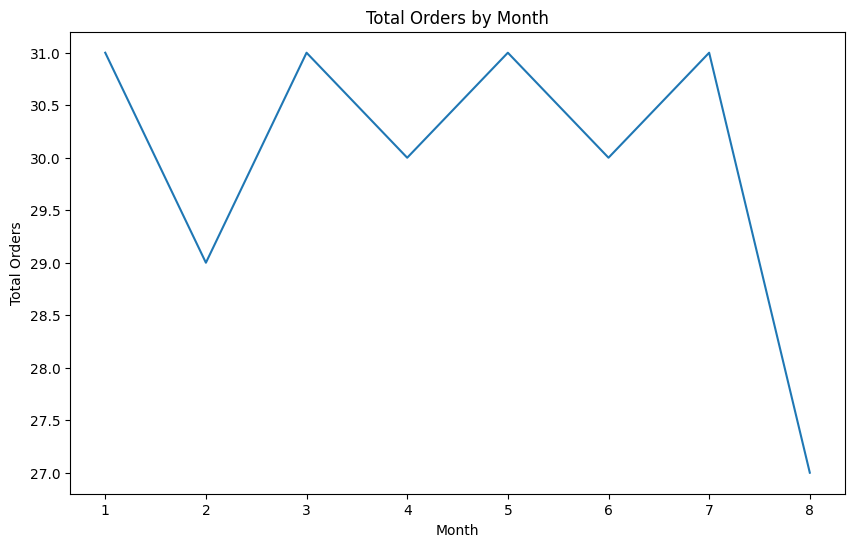

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values)
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders by Month')
plt.show()

In [20]:
df.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,year,month,day
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,1,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,1,2
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,1,3
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,1,4
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,1,5


##### Total Sale by Product Categories

In [21]:
t_revenue_by_product_cat = df.groupby('Product Category')['Total Revenue'].sum()
t_revenue_by_product_cat.sort_values(ascending=False)

,Total Revenue
Product Category,
Electronics,34982.41
Home Appliances,18646.16
Sports,14326.52
Clothing,8128.93
Beauty Products,2621.90
Books,1861.93


##### Monthly Sale by Product Categories

In [22]:
monthly_rev_by_pcat = df.groupby(['month', 'Product Category'], as_index=False)['Total Revenue'].sum()
monthly_rev_by_pcat.sort_values(['month', 'Total Revenue'], ascending=[True, False])


,month,Product Category,Total Revenue
3,1,Electronics,7999.90
4,1,Home Appliances,2169.94
2,1,Clothing,1789.84
5,1,Sports,1579.83
0,1,Beauty Products,699.95
1,1,Books,308.86
11,2,Sports,2993.87
9,2,Electronics,2899.88
10,2,Home Appliances,2869.92
8,2,Clothing,1284.81


##### Total Revenue by Region

In [23]:
total_rev_by_region = df.groupby('Region')['Total Revenue'].sum()
total_rev_by_region.sort_values(ascending=False)

,Total Revenue
Region,
North America,36844.34
Asia,22455.45
Europe,21268.06


##### Total Revenue of Product Cat by Region

In [24]:
t_revenue_p_cat_by_region = df.groupby(['Product Category', 'Region'])['Total Revenue'].sum()
t_revenue_p_cat_by_region.sort_values(ascending=False)

,,Total Revenue
Product Category,Region,
Electronics,North America,34982.41
Home Appliances,Europe,18646.16
Sports,Asia,14326.52
Clothing,Asia,8128.93
Beauty Products,Europe,2621.90
Books,North America,1861.93


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

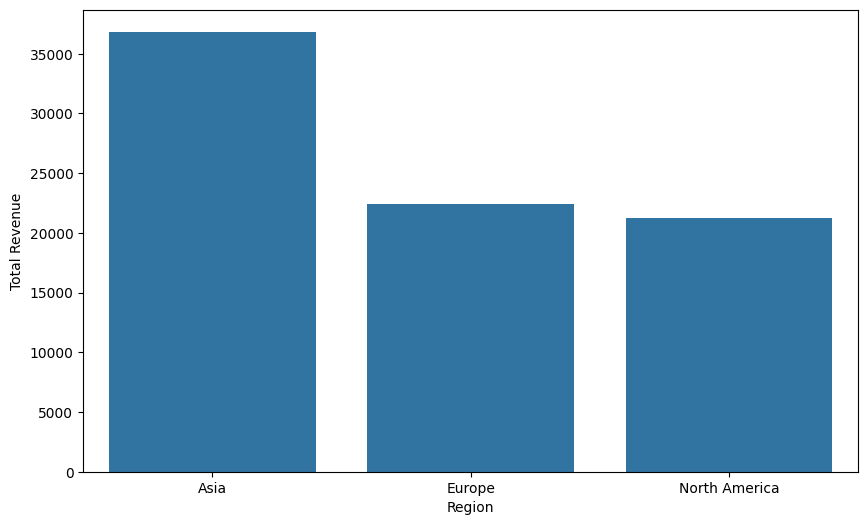

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_rev_by_region.index, y=total_rev_by_region.sort_values(ascending =False))
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt

##### Total Revene by Payment Method

In [26]:
total_Renvenue_by_payment_method = df.groupby('Payment Method')['Total Revenue'].sum()
total_Renvenue_by_payment_method.sort_values(ascending=False)

,Total Revenue
Payment Method,
Credit Card,51170.86
PayPal,21268.06
Debit Card,8128.93


##### Total Revenue of Payment method by Region

In [27]:
pmethod_by_region = df.groupby(['Region', 'Payment Method'])['Total Revenue'].sum()
pmethod_by_region.sort_values(ascending=False)

Region         Payment Method
North America  Credit Card       36844.34
Europe         PayPal            21268.06
Asia           Credit Card       14326.52
               Debit Card         8128.93
Name: Total Revenue, dtype: float64

##### Popular product Category

In [28]:
pop_product_cat = df.groupby('Product Category')['Units Sold'].sum().sort_values(ascending=False)
pop_product_cat

,Units Sold
Product Category,
Clothing,145
Books,114
Sports,88
Electronics,66
Home Appliances,59
Beauty Products,46


Text(0, 0.5, 'Units Sold')

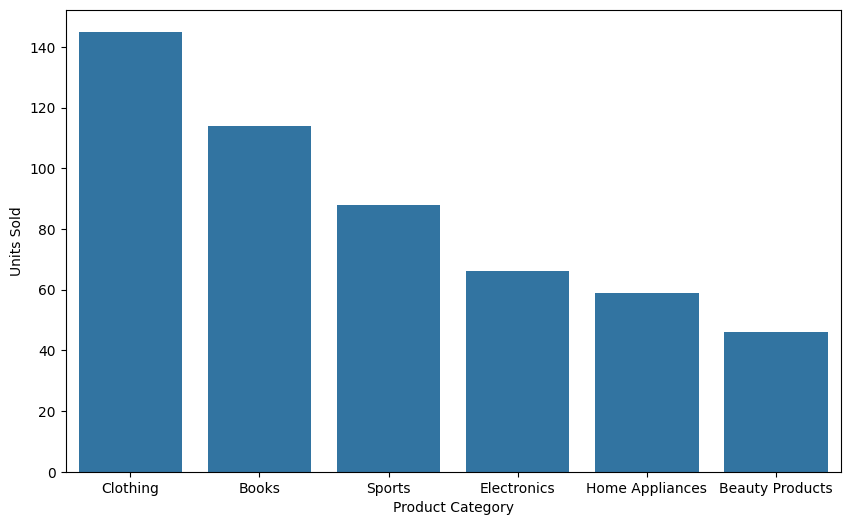

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(pop_product_cat)
plt.xlabel('Product Category')
plt.ylabel('Units Sold')

##### Popular product Categories by Region

In [30]:
pop_product_cat.index

Index(['Clothing', 'Books', 'Sports', 'Electronics', 'Home Appliances',
       'Beauty Products'],
      dtype='object', name='Product Category')

In [31]:
pop_product_cat.sort_values(ascending=False)

,Units Sold
Product Category,
Clothing,145
Books,114
Sports,88
Electronics,66
Home Appliances,59
Beauty Products,46


Popular product Cat by Region

In [32]:
pop_product_cat_by_region = df.groupby(['Region', 'Product Category'])['Units Sold'].sum()
pop_product_cat_by_region.sort_values(ascending=False)

Region         Product Category
Asia           Clothing            145
North America  Books               114
Asia           Sports               88
North America  Electronics          66
Europe         Home Appliances      59
               Beauty Products      46
Name: Units Sold, dtype: int64

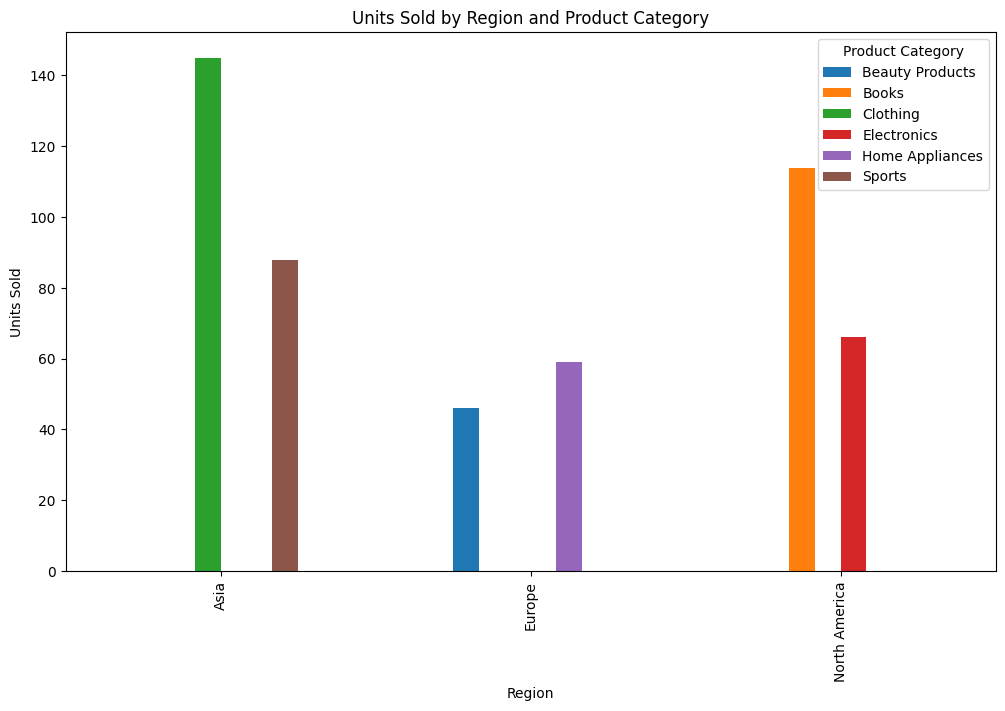

In [33]:
plot_data = pop_product_cat_by_region.unstack()
plot_data.plot(kind='bar', figsize=(12,7))
plt.ylabel("Units Sold")
plt.title("Units Sold by Region and Product Category")
plt.show()


In [34]:
pop_product_cat_by_region = df.pivot_table(index='Region', columns='Product Category', values='Units Sold', aggfunc='sum')
pop_product_cat_by_region

Product Category,Beauty Products,Books,Clothing,Electronics,Home Appliances,Sports
Region,,,,,,
Asia,NaN,NaN,145.0,NaN,NaN,88.0
Europe,46.0,NaN,NaN,NaN,59.0,NaN
North America,NaN,114.0,NaN,66.0,NaN,NaN


Text(0.5, 1.0, 'Popular Product Categories by Region')

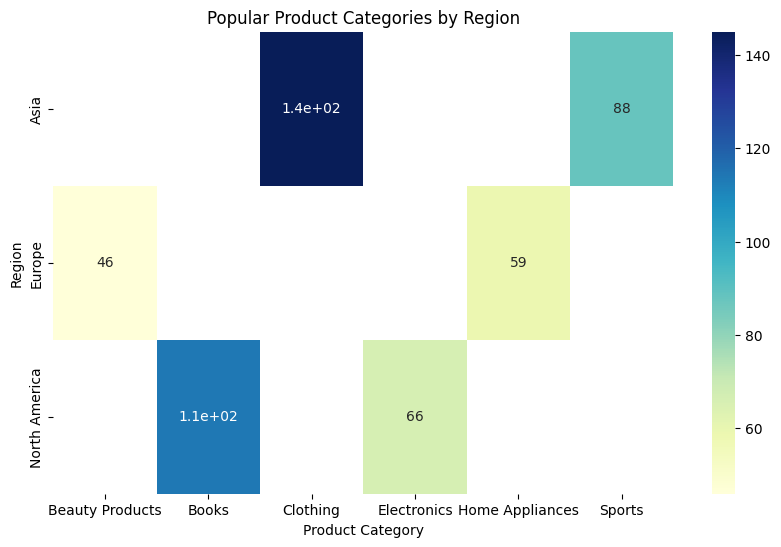

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(pop_product_cat_by_region, annot=True, cmap='YlGnBu')
plt.title('Popular Product Categories by Region')